<a href="https://colab.research.google.com/github/Predator21X-bot/Yield_Prediction/blob/main/Yield_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report
from sklearn import metrics
from sklearn import tree
import warnings
warnings.filterwarnings('ignore')

In [5]:
df = pd.read_csv('/content/Crop_Yield_Dataset_edit.csv')

In [6]:
df.head()

,Weight,SPAD,NDVI,N Content,Yield,Yield_B
0,0,29.9,0.227,1.63,1.48,4.89
1,30,38.3,0.283,1.82,2.50,7.53
2,60,39.6,0.340,2.14,3.46,10.07
3,90,41.2,0.353,2.22,4.31,11.32
4,120,41.7,0.370,2.47,4.79,12.36


In [7]:
df.tail()

,Weight,SPAD,NDVI,N Content,Yield,Yield_B
27,90,42.8,0.63,2.29,4.31,11.32
28,120,46.5,0.65,2.42,4.79,12.36
29,150,48.9,0.69,2.50,5.05,13.07
30,180,48.3,0.68,2.70,4.77,13.33
31,240,49.5,0.67,2.36,4.48,13.78


In [8]:
df.size

192

In [9]:
df.shape

(32, 6)

In [10]:
df.describe()

,Weight,SPAD,NDVI,N Content,Yield,Yield_B
count,32.000000,32.000000,32.000000,32.000000,32.000000,32.00000
mean,108.750000,41.415625,0.502719,2.454312,3.855000,10.79375
std,76.104766,5.927743,0.166383,0.616700,1.211227,2.99013
min,0.000000,26.700000,0.227000,1.490000,1.480000,4.89000
25%,52.500000,39.200000,0.365750,2.020000,3.220000,9.43500
50%,105.000000,42.850000,0.528500,2.390000,4.395000,11.84000
75%,157.500000,45.950000,0.650000,2.735000,4.775000,13.13500
max,240.000000,49.500000,0.740000,3.780000,5.050000,13.78000


In [12]:
df['Yield'].unique()

array([1.48, 2.5 , 3.46, 4.31, 4.79, 5.05, 4.77, 4.48])

In [13]:
df.columns

Index(['Weight', 'SPAD', 'NDVI', 'N Content ', 'Yield', 'Yield_B'], dtype='object')

In [14]:
df['Yield'].value_counts()

1.48    4
2.50    4
3.46    4
4.31    4
4.79    4
5.05    4
4.77    4
4.48    4
Name: Yield, dtype: int64

In [15]:
df.dtypes

Weight          int64
SPAD          float64
NDVI          float64
N Content     float64
Yield         float64
Yield_B       float64
dtype: object

In [16]:
s = df.corr()
print(s)

              Weight      SPAD      NDVI  N Content      Yield   Yield_B
Weight      1.000000  0.825214  0.634379    0.496714  0.815724  0.912125
SPAD        0.825214  1.000000  0.827204    0.589670  0.933575  0.941452
NDVI        0.634379  0.827204  1.000000    0.614026  0.716046  0.727797
N Content   0.496714  0.589670  0.614026    1.000000  0.565377  0.570440
Yield       0.815724  0.933575  0.716046    0.565377  1.000000  0.974077
Yield_B     0.912125  0.941452  0.727797    0.570440  0.974077  1.000000


<Axes: >

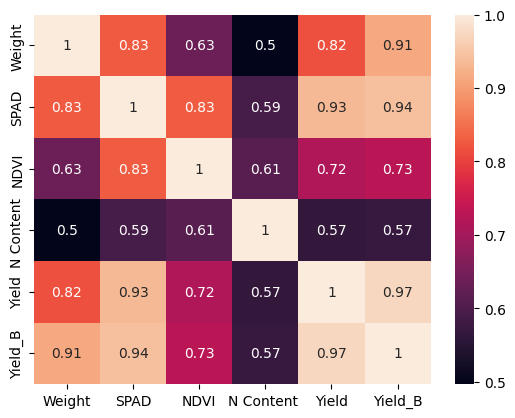

In [17]:
sns.heatmap(s,annot = True)

In [70]:
  features = df[['Weight','SPAD','NDVI','N Content ','Yield_B']]
  target = df['Yield']

In [71]:

# Initialzing empty lists to append all model's name and corresponding name
acc = []
model = []

In [72]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(features,target,test_size= 0.2,random_state = 2)

**DECISION TREE**

In [110]:
from sklearn.tree import DecisionTreeClassifier
# Convert to categorical by rounding
y_train = round(y_train)
y_test = round(y_test)


In [102]:
DecisionTree = DecisionTreeClassifier(criterion = 'entropy',max_depth = 5,random_state = 2)
DecisionTree.fit(X_train,y_train)
predicted = DecisionTree.predict(X_test)
x = metrics.accuracy_score(y_test,predicted)
acc.append(x)
model.append('Decision Tree')
print("Decision Tree's accuracy is", x * 100)

print(classification_report(y_test,predicted))

Decision Tree's accuracy is 14.285714285714285
              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00         0
         1.0       0.00      0.00      0.00         1
         2.0       1.00      0.50      0.67         2
         3.0       0.00      0.00      0.00         0
         4.0       0.00      0.00      0.00         1
         5.0       0.00      0.00      0.00         3

    accuracy                           0.14         7
   macro avg       0.17      0.08      0.11         7
weighted avg       0.29      0.14      0.19         7



In [111]:
# target = round(target)  # Convert to categorical by rounding

from sklearn.model_selection import cross_val_score

In [112]:
score = cross_val_score(DecisionTree,features,target,cv = 5)

In [113]:
score

array([0.71428571, 0.71428571, 1.        , 0.66666667, 1.        ])

**NAIVE BAYES(GAUSSIAN)**

In [79]:
from sklearn.naive_bayes import GaussianNB

In [80]:
Naive_Bayes = GaussianNB()
Naive_Bayes.fit(X_train,y_train)

predicted = Naive_Bayes.predict(X_test)
X = metrics.accuracy_score(y_test,predicted)
acc.append(x)
model.append('Naive Bayes')
print('Naive Bayes accuracy is',x * 100)

print(classification_report(y_test,predicted))

Naive Bayes accuracy is 71.42857142857143
              precision    recall  f1-score   support

         1.0       1.00      1.00      1.00         1
         2.0       1.00      0.50      0.67         2
         4.0       0.00      0.00      0.00         1
         5.0       0.67      0.67      0.67         3

    accuracy                           0.57         7
   macro avg       0.67      0.54      0.58         7
weighted avg       0.71      0.57      0.62         7



In [81]:
score = cross_val_score(Naive_Bayes,features,target,cv = 5)

In [82]:
score

array([0.57142857, 0.85714286, 0.5       , 0.66666667, 1.        ])

**LOGISTIC REGRESSION**

In [83]:
from sklearn.linear_model import LogisticRegression

In [84]:
LogReg = LogisticRegression()
LogReg.fit(X_train,y_train)

predicted = LogReg.predict(X_test)
x = metrics.accuracy_score(y_test,predicted)
acc.append(x)
model.append('Logistic Regression')
print("Logistic Regression Accuracy is",x * 100)
print(classification_report(y_test,predicted))

Logistic Regression Accuracy is 71.42857142857143
              precision    recall  f1-score   support

         1.0       1.00      1.00      1.00         1
         2.0       1.00      1.00      1.00         2
         4.0       0.00      0.00      0.00         1
         5.0       0.67      0.67      0.67         3

    accuracy                           0.71         7
   macro avg       0.67      0.67      0.67         7
weighted avg       0.71      0.71      0.71         7



In [85]:
score = cross_val_score(LogReg,features,target,cv = 5)

In [86]:
score

array([0.85714286, 0.85714286, 0.33333333, 0.66666667, 0.83333333])

**Support vector Machines(SVM)**

In [87]:
from sklearn.svm import SVC

In [88]:
SVM = SVC(gamma = 'auto')
SVM.fit(X_train,y_train)

predicted = SVM.predict(X_test)
x = metrics.accuracy_score(y_test,predicted)
acc.append(x)
model.append('SVM')
print('SVM accuracy score is',x * 100)
print(classification_report(y_test,predicted))

SVM accuracy score is 85.71428571428571
              precision    recall  f1-score   support

         1.0       1.00      1.00      1.00         1
         2.0       1.00      0.50      0.67         2
         4.0       1.00      1.00      1.00         1
         5.0       0.75      1.00      0.86         3

    accuracy                           0.86         7
   macro avg       0.94      0.88      0.88         7
weighted avg       0.89      0.86      0.84         7



In [89]:
score = cross_val_score(SVM,features,target,cv = 5)

In [90]:
score

array([0.85714286, 1.        , 1.        , 0.83333333, 0.83333333])

**RANDOM FOREST**

In [91]:
from sklearn.ensemble import RandomForestClassifier

In [92]:
RF = RandomForestClassifier(n_estimators=29, criterion = 'entropy',random_state=0)
RF.fit(X_train,y_train)
predicted = RF.predict(X_test)
x = metrics.accuracy_score(y_test,predicted)
acc.append(x)
model.append('Random Forest')
print("Random Forest Accuracy is ",x * 100)
print(classification_report(y_test,predicted))

Random Forest Accuracy is  100.0
              precision    recall  f1-score   support

         1.0       1.00      1.00      1.00         1
         2.0       1.00      1.00      1.00         2
         4.0       1.00      1.00      1.00         1
         5.0       1.00      1.00      1.00         3

    accuracy                           1.00         7
   macro avg       1.00      1.00      1.00         7
weighted avg       1.00      1.00      1.00         7



In [93]:
score = cross_val_score(RF,features,target,cv = 5)

In [94]:
score

array([1.        , 0.85714286, 0.83333333, 0.83333333, 1.        ])

**XG BOOST**

In [95]:
import xgboost as xgb

In [96]:
print("Unique values in y_train:", np.unique(y_train))
# Subtract 1 from the target variable to make sure it starts from 0
y_train = y_train.astype(int) - 1



Unique values in y_train: [1. 2. 3. 4. 5.]


In [58]:
# XB = xgb.XGBClassifier()
# XB.fit(X_train,y_train)
# predicted = XB.predict(X_test)
# x = metrics.accuracy_score(y_test,predicted)
# acc.append(x)
# model.append('XG Boost')
# print('XG Boost Accuracy is ',x * 100)
# print(classification_report(y_test,predicted))



In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
score = cross_val_score(XB,features,target,cv = 5)

In [ ]:
score

array([0.98636364, 0.99318182, 0.99545455, 0.99090909, 0.98409091])

**ACCURACY COMPARISION**

<Axes: title={'center': 'Accuracy Comparision'}, xlabel='Accuracy', ylabel='Algorithms'>

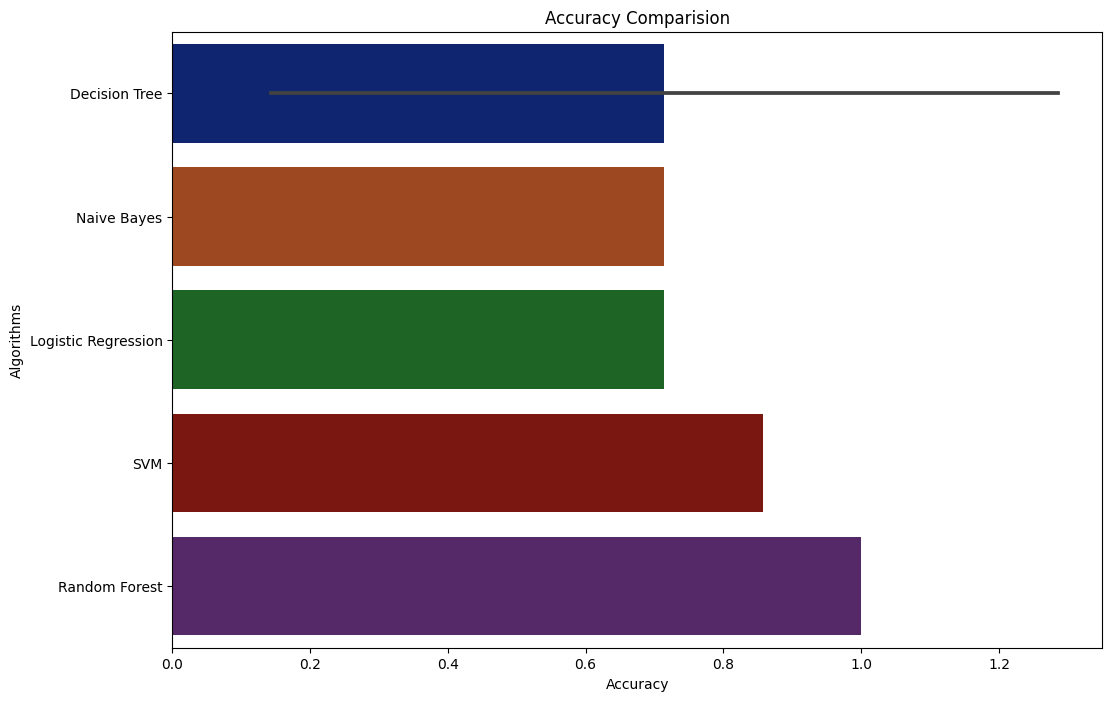

In [114]:
plt.figure(figsize = [12,8],dpi = 100)
plt.title('Accuracy Comparision')
plt.xlabel('Accuracy')
plt.ylabel('Algorithms')
sns.barplot(x = acc,y = model,palette = 'dark')

In [98]:
accuracy_models = dict(zip(model,acc))
for k,v in accuracy_models.items():
  print(k,'-->',v* 100,'%')

Decision Tree --> 71.42857142857143 %
Naive Bayes --> 71.42857142857143 %
Logistic Regression --> 71.42857142857143 %
SVM --> 85.71428571428571 %
Random Forest --> 100.0 %


**PREDICTION**

In [116]:
data = np.array([[90,42.8, 0.63, 2.29, 11.32]])
prediction = RF.predict(data)
print(prediction)

[4.]


In [68]:
svc = SVC(kernel='rbf')
svc.fit(X_train,y_train)

SVC()

In [69]:
import pickle
pickle.dump(svc,open('model.pkl','wb'))